In [ ]:
################################################################################
#                                                                              #
#         EMC2 WP 2 Processing 1.0                                             #
#         Filter on buildings with no dwellings                                #
#         Author : Perez Joan                                                  #
#                                                                              #
################################################################################

In [92]:
# 0.1 Packages & layers
import geopandas as gpd
import contextily
import folium
from folium.plugins import MarkerCluster
from ipyleaflet import Map, GeoData, basemaps, LayersControl

In [93]:
# Read the data
building = gpd.read_file("C:\\Users\\jperez\\Documents\\Current 1\\France - EMC2\\processing\\1.1\\EMC2_CA_Subset_WP2.gpkg", layer="building")

In [94]:
# 1. Indexes to remove
# light buildings
indexes_1 = building[building["construction_legere"] == True].index
# Building with no dwelling
indexes_2 = building[building["nombre_de_logements"] == 0].index
# Specialized buildings
indexes_3 = building[building["nature"] != "Indifférenciée"].index
# Building under construction (not in service)
indexes_4 = building[building["etat_de_l_objet"] != "En service"].index
# Annex buildings (official definition : Petit bâtiment à vocation d'annexe au sens fiscal : garage externe, abri...)
indexes_5 = building[building["usage_1"] == "Annexe"].index

In [95]:
# merge indexes, remove duplicates & perform the filter
merged_idx = indexes_1.union(indexes_2).union(indexes_3).union(indexes_4).union(indexes_5)
filtered_building = building.drop(merged_idx)

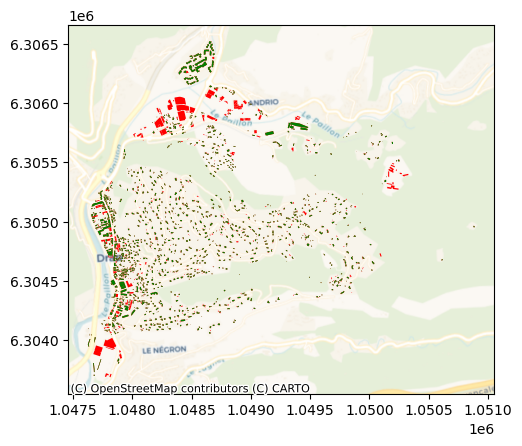

In [96]:
# Create a plot all building
ax = building.plot(color='red')
# Plot road_clean on the same axis
filtered_building.plot(ax=ax, color='green')
contextily.add_basemap(ax, crs=filtered_building.crs, source=contextily.providers.CartoDB.Voyager)

In [121]:
# Add building markers
from ipyleaflet import Map, GeoData, basemaps, LayersControl, Polygon
map = folium.Map(location=[43.7544, 7.3208], tiles="OpenStreetMap", zoom_start=14.5)
building.to_file("file.geojson",driver='GeoJSON')
filtered_building.to_file("file2.geojson",driver='GeoJSON')
data=geopandas.read_file("file.geojson")
data2=geopandas.read_file("file2.geojson")
folium.GeoJson(data, color = "red").add_to(map)
folium.GeoJson(data2, color = "green").add_to(map)
map

In [122]:
# Write layer
filtered_building.to_file("EMC2_CA_Subset_WP2.gpkg", layer="Buildings_with_dwellings_NA_included", driver="GPKG")